In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('IMDB Dataset.csv')
print(df.head(10))

                                              review sentiment Unnamed: 2  \
0  One of the other reviewers has mentioned that ...  positive        NaN   
1  A wonderful little production. <br /><br />The...  positive        NaN   
2  I thought this was a wonderful way to spend ti...  positive        NaN   
3  Basically there's a family where a little boy ...  negative        NaN   
4  Petter Mattei's "Love in the Time of Money" is...  positive        NaN   
5  Probably my all-time favorite movie, a story o...  positive        NaN   
6  I sure would like to see a resurrection of a u...  positive        NaN   
7  This show was an amazing, fresh & innovative i...  negative        NaN   
8  Encouraged by the positive comments about this...  negative        NaN   
9  If you like original gut wrenching laughter yo...  positive        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        N

In [2]:
print("\nPrzykładowa recenzja:")
print(df.review[1])

print("\nSentiment reviews:")
print(df['sentiment'])

print("\nUnikalne wartości sentymentu:")
print(df['sentiment'].unique())


Przykładowa recenzja:
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) ar

In [3]:
positive_reviews = df[df['sentiment'] == 'positive']
print("\nRecenzje pozytywne:")
print(positive_reviews.head())

negative_reviews = df[df['sentiment'] == 'negative']
print("\nRecenzje negatywne:")
print(negative_reviews.head())

neg_reviews_count = negative_reviews.count()
pos_reviews_count = positive_reviews.count()
print("\nLiczba recenzji negatywnych:", neg_reviews_count[0])
print("Liczba recenzji pozytywnych:", pos_reviews_count[0])


Recenzje pozytywne:
                                              review sentiment Unnamed: 2  \
0  One of the other reviewers has mentioned that ...  positive        NaN   
1  A wonderful little production. <br /><br />The...  positive        NaN   
2  I thought this was a wonderful way to spend ti...  positive        NaN   
4  Petter Mattei's "Love in the Time of Money" is...  positive        NaN   
5  Probably my all-time favorite movie, a story o...  positive        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  
0        NaN         NaN  

/var/folders/nd/d8g7mdc1287fs822x4jnqrtr0000gn/T/ipykernel_92328/430441221.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nLiczba recenzji negatywnych:", neg_reviews_count[0])
/var/folders/nd/d8g7mdc1287fs822x4jnqrtr0000gn/T/ipykernel_92328/430441221.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Liczba recenzji pozytywnych:", pos_reviews_count[0])


In [4]:
positive_reviews.to_csv('positive_reviews.csv', index=False)
negative_reviews.to_csv('negative_reviews.csv', index=False)
print("\nRecenzje zapisane do plików CSV:")
print("- positive_reviews.csv")
print("- negative_reviews.csv")


Recenzje zapisane do plików CSV:
- positive_reviews.csv
- negative_reviews.csv


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arturobernak/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/arturobernak/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
stop_words = set(stopwords.words('english'))

def remove_stopwords_and_clean(text):
    text = text.lower()
    words = word_tokenize(text)
    
    filtered_words = [re.sub(r'[^a-z]', '', word) for word in words if word not in stop_words]
    
    filtered_words = [word for word in filtered_words if len(word) > 1]
    
    unique_words = []
    seen_words = set()
    for word in filtered_words:
        if word not in seen_words:
            unique_words.append(word)
            seen_words.add(word)
    
    return " ".join(unique_words)

In [7]:
df['review_cleaned'] = df['review'].apply(remove_stopwords_and_clean)

print("\nPierwsze oczyszczone recenzje:")
print(df[['review', 'review_cleaned']].head())

print("\nPoszczególne słowa w oczyszczonych recenzjach:")
for index, row in df.head(3).iterrows():
    cleaned_review = row['review_cleaned']
    words = cleaned_review.split()
    print(f"\nRecenzja {index}:")
    print("\n".join(words[:20]))
    print("-" * 40)


Pierwsze oczyszczone recenzje:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      review_cleaned  
0  one reviewers mentioned watching oz episode ll...  
1  wonderful little production br filming techniq...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake thinks zombie...  
4  petter mattei love time money visually stunnin...  

Poszczególne słowa w oczyszczonych recenzjach:

Recenzja 0:
one
reviewers
mentioned
watching
oz
episode
ll
hooked
right
exactly
happened
me
br
first
thing
struck
brutality
unflinching
scenes
violence
----------------------------------------

Recenzja 1:
wonderful
little
production
br
filming
techniq

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df['review_cleaned'])

print("\nKształt macierzy TF-IDF:", tfidf_matrix.shape)
print(f"Liczba dokumentów: {tfidf_matrix.shape[0]}")
print(f"Liczba cech: {tfidf_matrix.shape[1]}")


Kształt macierzy TF-IDF: (49998, 5000)
Liczba dokumentów: 49998
Liczba cech: 5000


In [9]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nPodział danych:")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Podział danych:
Shape of X_train: (39998, 5000)
Shape of X_test: (10000, 5000)
Shape of y_train: (39998,)
Shape of y_test: (10000,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("\nWyniki modelu KNN:")
print(f"Accuracy:  {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall:    {recall_knn:.4f}")
print(f"F1-score:  {f1_knn:.4f}")



Wyniki modelu KNN:
Accuracy:  0.7996
Precision: 0.8015
Recall:    0.7996
F1-score:  0.7991


In [11]:
new_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "The plot was boring and the acting was terrible. I wasted my time.",
    "It was an okay film, nothing special but not bad either.",
    "Highly recommend this film, it was a thrilling experience.",
    "I regret watching this, it was a complete disaster."
]

new_reviews_cleaned = [remove_stopwords_and_clean(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)

predicted_sentiments_knn = knn.predict(new_reviews_tfidf)

for review, sentiment in zip(new_reviews, predicted_sentiments_knn):
    print(f"Review: '{review}'")
    print(f"→ Predicted Sentiment: {sentiment}\n")

Review: 'This movie was absolutely fantastic! I loved every minute of it.'
→ Predicted Sentiment: positive

Review: 'The plot was boring and the acting was terrible. I wasted my time.'
→ Predicted Sentiment: negative

Review: 'It was an okay film, nothing special but not bad either.'
→ Predicted Sentiment: negative

Review: 'Highly recommend this film, it was a thrilling experience.'
→ Predicted Sentiment: positive

Review: 'I regret watching this, it was a complete disaster.'
→ Predicted Sentiment: negative



In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nWyniki modelu Random Forest:")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-score:  {f1_rf:.4f}")


Wyniki modelu Random Forest:
Accuracy:  0.8513
Precision: 0.8517
Recall:    0.8513
F1-score:  0.8513


In [13]:
predicted_sentiments_rf = rf_classifier.predict(new_reviews_tfidf)

for review, sentiment in zip(new_reviews, predicted_sentiments_rf):
    print(f"Review: '{review}'")
    print(f"→ Predicted Sentiment: {sentiment}\n")

Review: 'This movie was absolutely fantastic! I loved every minute of it.'
→ Predicted Sentiment: positive

Review: 'The plot was boring and the acting was terrible. I wasted my time.'
→ Predicted Sentiment: negative

Review: 'It was an okay film, nothing special but not bad either.'
→ Predicted Sentiment: negative

Review: 'Highly recommend this film, it was a thrilling experience.'
→ Predicted Sentiment: positive

Review: 'I regret watching this, it was a complete disaster.'
→ Predicted Sentiment: positive



In [14]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

y_pred_lr = logistic_regression_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("\nWyniki modelu Logistic Regression:")
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-score:  {f1_lr:.4f}")


Wyniki modelu Logistic Regression:
Accuracy:  0.8898
Precision: 0.8898
Recall:    0.8898
F1-score:  0.8898


In [15]:
predicted_sentiments_lr = logistic_regression_model.predict(new_reviews_tfidf)

for review, sentiment in zip(new_reviews, predicted_sentiments_lr):
    print(f"Review: '{review}'")
    print(f"→ Predicted Sentiment: {sentiment}\n")

Review: 'This movie was absolutely fantastic! I loved every minute of it.'
→ Predicted Sentiment: positive

Review: 'The plot was boring and the acting was terrible. I wasted my time.'
→ Predicted Sentiment: negative

Review: 'It was an okay film, nothing special but not bad either.'
→ Predicted Sentiment: negative

Review: 'Highly recommend this film, it was a thrilling experience.'
→ Predicted Sentiment: positive

Review: 'I regret watching this, it was a complete disaster.'
→ Predicted Sentiment: negative



In [16]:
comparison_data = {
    'Model': ['KNN', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_knn, accuracy_rf, accuracy_lr],
    'Precision': [precision_knn, precision_rf, precision_lr],
    'Recall': [recall_knn, recall_rf, recall_lr],
    'F1-score': [f1_knn, f1_rf, f1_lr]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nTabela porównawcza:")
print(comparison_df.to_string(index=False))

best_model_idx = comparison_df['Accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']

print(f"\n Najlepszy model: {best_model_name} (Accuracy: {best_accuracy:.4f})")


Tabela porównawcza:
              Model  Accuracy  Precision  Recall  F1-score
                KNN    0.7996   0.801542  0.7996  0.799052
      Random Forest    0.8513   0.851689  0.8513  0.851310
Logistic Regression    0.8898   0.889801  0.8898  0.889793

 Najlepszy model: Logistic Regression (Accuracy: 0.8898)


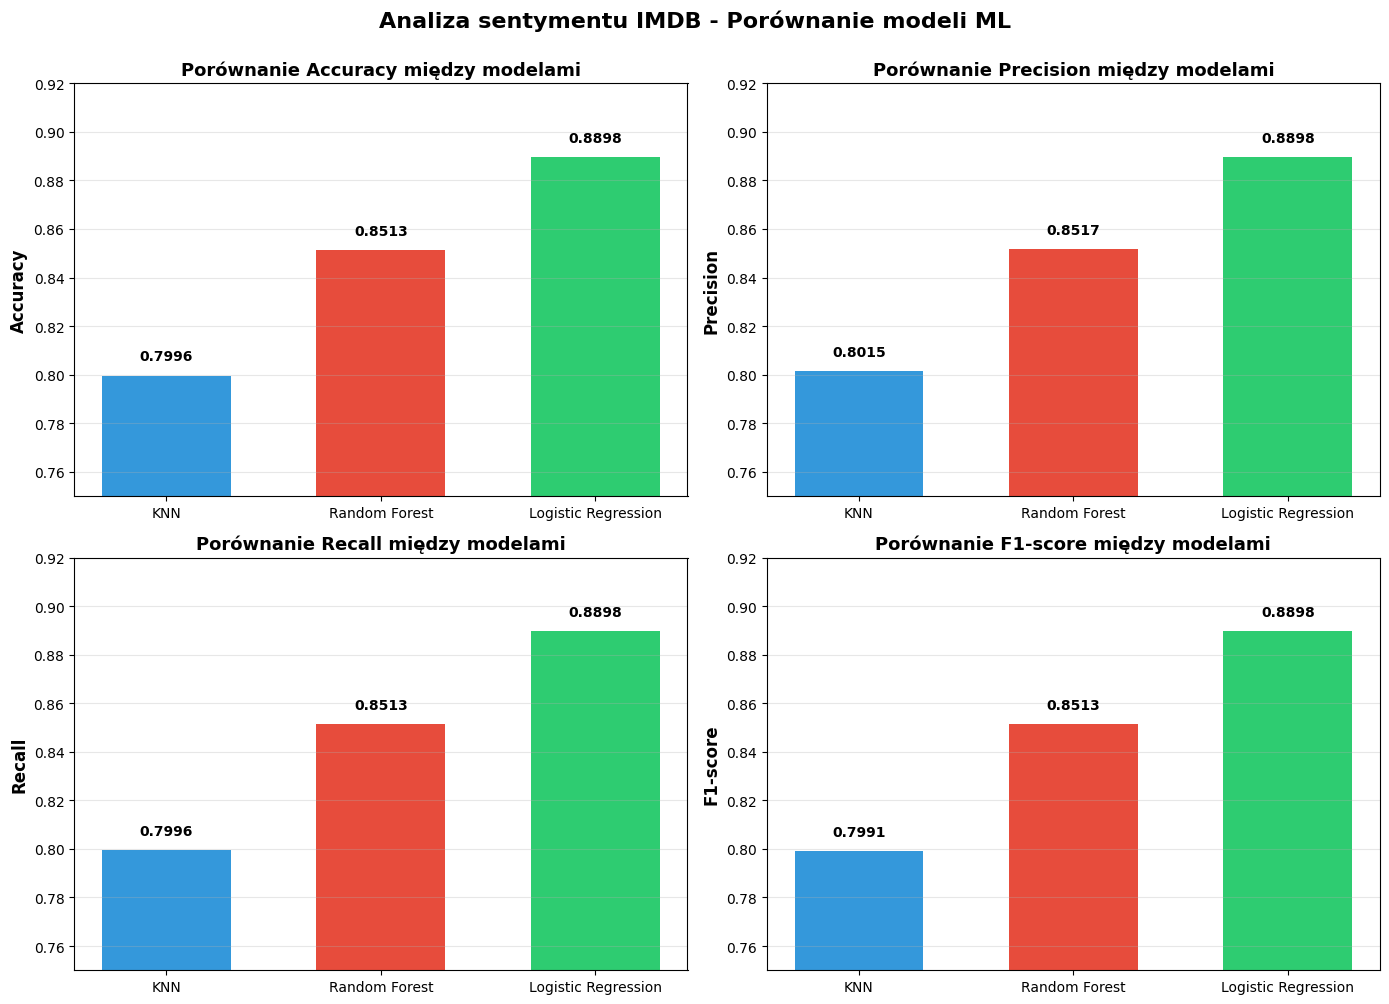

In [17]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = comparison_df['Model']
x = np.arange(len(models))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

colors = ['#3498db', '#e74c3c', '#2ecc71']

for i, metric in enumerate(metrics):
    metric_values = comparison_df[metric]
    bars = axes[i].bar(x, metric_values, 0.6, label=metric, color=colors)
    
    axes[i].set_ylabel(metric, fontsize=12, fontweight='bold')
    axes[i].set_title(f'Porównanie {metric} między modelami', fontsize=13, fontweight='bold')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(models, fontsize=10)
    axes[i].set_ylim([0.75, 0.92])
    axes[i].grid(axis='y', alpha=0.3)
    
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., yval + 0.005, 
                    f'{yval:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Analiza sentymentu IMDB - Porównanie modeli ML', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


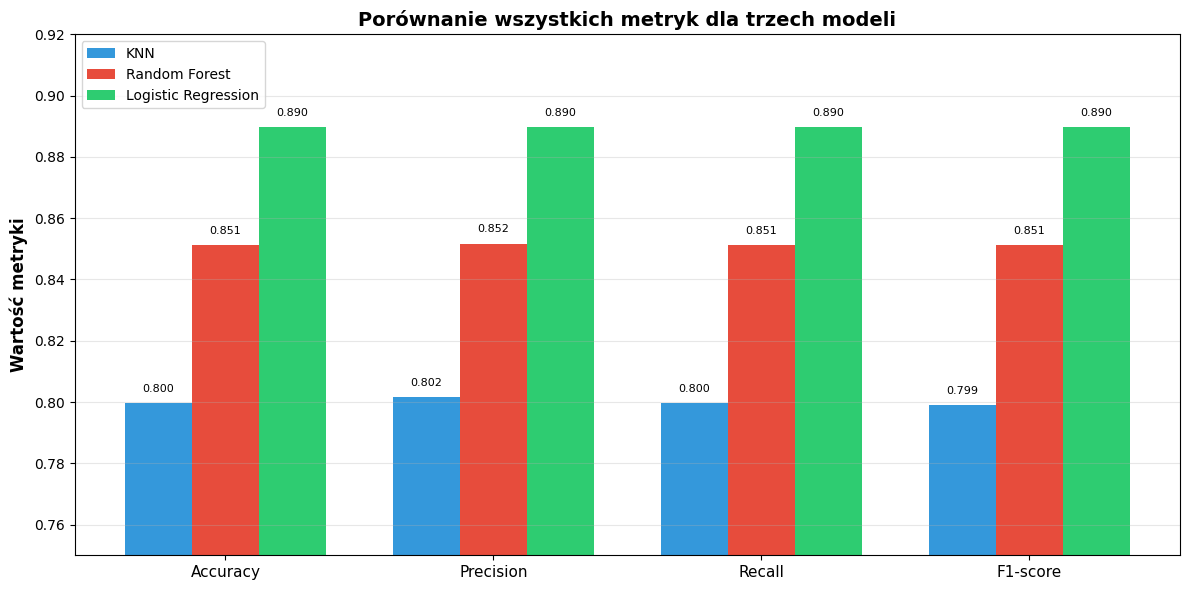

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))
width = 0.25

bars1 = ax.bar(x - width, comparison_df.iloc[0, 1:], width, label='KNN', color='#3498db')
bars2 = ax.bar(x, comparison_df.iloc[1, 1:], width, label='Random Forest', color='#e74c3c')
bars3 = ax.bar(x + width, comparison_df.iloc[2, 1:], width, label='Logistic Regression', color='#2ecc71')

ax.set_ylabel('Wartość metryki', fontsize=12, fontweight='bold')
ax.set_title('Porównanie wszystkich metryk dla trzech modeli', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=10)
ax.set_ylim([0.75, 0.92])
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.003,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()